### Project Based-Intern: Rakamin Academy x Id/x Partners
Salsabila Rani

# Data Understanding

## 1. imports

In [2]:
# import all necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split as tts #for training and testing data
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier as KNN #pembuatan model KNeighbors Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score #performance and evaluation
from sklearn.feature_selection import SelectKBest, chi2 #feature Selection
#from imblearn.over_sampling import SMOTE #imbalance data

import warnings
warnings.filterwarnings('ignore')

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

from termcolor import colored

## 2. load the dataset

In [2]:
# get the dataset using pandas documentation

loan_data = pd.read_csv('loan_data_2007_2014.csv')

## 3. quick look into the dataset

In [5]:
# checking basic info of 'loan_data' in pandas

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# reading the 'loan_data' in pandas

loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. statistics summaries

In [5]:
# getting basic statistical details of the data frame

loan_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [6]:
# check duplicated values

loan_data.duplicated().sum()

0

## 5. EDA
Exploratory Data Analysis

#### data type: object
categorical data

In [3]:
loan_data.select_dtypes(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,C2,Financial Advisor,4 years,MORTGAGE,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,Apr-03,w,Jan-16,Feb-16,Jan-16,INDIVIDUAL
466281,60 months,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,Jun-97,f,Dec-14,NaN,Jan-16,INDIVIDUAL
466282,60 months,D,D1,patrol,7 years,MORTGAGE,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,Dec-01,f,Jan-16,Feb-16,Dec-15,INDIVIDUAL
466283,36 months,A,A4,Server Engineer Lead,3 years,OWN,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,Feb-03,w,Dec-14,NaN,Apr-15,INDIVIDUAL


In [ ]:
# get the names of all columns
obj_col = loan_data.select_dtypes(include='object')

# create a figure with subplots
num_col = len(obj_col)
num_row = (num_col + 7) // 4
fig, axes = plt.subplots(nrows=num_row, ncols=3, figsize=(15, 5*num_row))
axes = axes.flatten()

# create a boxplot for each numerical variable using seaborn
for i, col in enumerate(obj_col):
    high_values = loan_data[col].value_counts().nlargest(5).index
    cleaned_data = loan_data[loan_data[col].isin(high_values)]
    sns.countplot(x=col, data=cleaned_data, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)
    
# remove any extra empty subplots if needed
if num_col < len(axes):
    for i in range(num_col, len(axes)):
        fig.delaxes(axes[i])
        
# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

# Data Preparation

## 1. data quality check and missing value 

<AxesSubplot: >

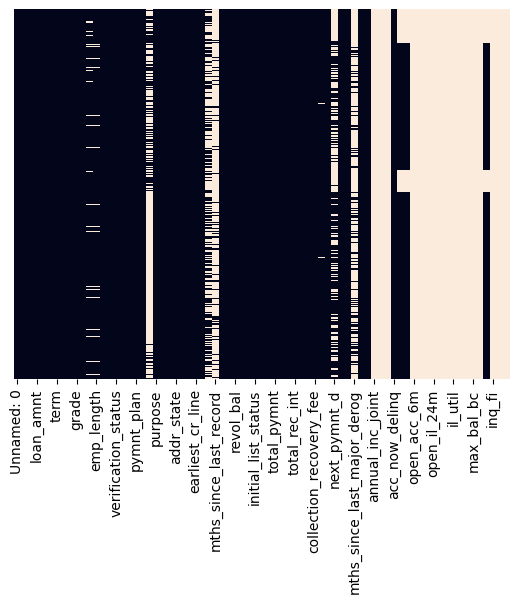

In [157]:
# reading the missing values by helicopter view using heatmap visualization

sns.heatmap(loan_data.isnull(), yticklabels=False, cbar=False)

### 1.1 percentage of missing values for columns and rows

In [4]:
# checking columns-wise null percentages

cols = pd.DataFrame(loan_data.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                             precentage_missing_value
Unnamed: 0                                       0.00
zip_code                                         0.00
addr_state                                       0.00
dti                                              0.00
revol_bal                                        0.00
initial_list_status                              0.00
out_prncp_inv                                    0.00
total_pymnt                                      0.00
title                                            0.00
total_pymnt_inv                                  0.00
total_rec_int                                    0.00
total_rec_late_fee                               0.00
recoveries                                       0.00
collection_recovery_fee                          0.00
last_pymnt_amnt                                  0.00
policy_code                                      0.00
application_type                                 0.00
total_rec_prncp             

In [9]:
# summary of missing values associated with columns

print(str(round(100.0 * cols[cols['precentage_missing_value']==0].count()/len(cols),2))+"% " +"columns have no missing value")
print(str(round(100.0 * cols[(cols['precentage_missing_value']>0)&(cols['precentage_missing_value']<=10)].count()/len(cols),2))+"% " +"columns have missing value between 0-10 %")
print(str(round(100.0 * cols[(cols['precentage_missing_value']>10)&(cols['precentage_missing_value']<=50)].count()/len(cols),2))+"% " +"columns have missing value between 10-50 %")
print(str(round(100.0 * cols[cols['precentage_missing_value']>50].count()/len(cols),2))+"% " +"columns have more than 50% missing value")

precentage_missing_value    49.33
dtype: float64% columns have no missing value
precentage_missing_value    17.33
dtype: float64% columns have missing value between 0-10 %
precentage_missing_value    5.33
dtype: float64% columns have missing value between 10-50 %
precentage_missing_value    28.0
dtype: float64% columns have more than 50% missing value


In [10]:
# checking rows-wise null percentages

rows = pd.DataFrame(loan_data.isnull().sum(axis=1), columns=['num_missing_value'])
rows

,num_missing_value
0,25
1,24
2,26
3,23
4,22
...,...
466280,21
466281,21
466282,19
466283,21


### 1.2 removing the columns with high percentage of missing values(>50%)

In [4]:
# droping column that having more than 50 % null values
# create new DataFrame: 'new_loan_data'

new_loan_data = loan_data.drop(loan_data.columns[loan_data.apply(lambda cols: (cols.isnull().sum()/len(loan_data)*100) > 50)], axis=1)
print (new_loan_data.columns)

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [5]:
# droping unnecessary column 'Unnamed: 0' 

new_loan_data = new_loan_data.drop(columns ='Unnamed: 0'	)

In [6]:
# checking dimensions of DataFrame after dropping columns

new_loan_data.shape

(466285, 53)

In [7]:
# drops the current index of the new DataFrame and replaces it with an index of increasing integers

new_loan_data.reset_index(drop = True)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,Jan-16,432.64,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,Dec-14,17.50,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,Jan-16,514.34,Feb-16,Dec-15,0.0,1,

In [15]:
# re-checking columns with missing values 
# measured by percentage

round(100.0* new_loan_data.isnull().sum()/len(new_loan_data), 2).sort_values()

id                             0.00
title                          0.00
zip_code                       0.00
addr_state                     0.00
dti                            0.00
policy_code                    0.00
last_pymnt_amnt                0.00
collection_recovery_fee        0.00
recoveries                     0.00
revol_bal                      0.00
total_rec_late_fee             0.00
total_rec_int                  0.00
initial_list_status            0.00
out_prncp                      0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
purpose                        0.00
total_pymnt_inv                0.00
url                            0.00
loan_status                    0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
pymnt_plan                  

### 1.3 understanding best imputation technique for ~4% mising values

<strong> the focus columns for this analysis:

emp_length

In [8]:
# checking the data types of focus column

focus_col1 = ['emp_length']
new_loan_data[focus_col1].dtypes

emp_length    object
dtype: object

the focus column seem to be of "object" type. it is a categorical column. <br/> 
however, we will look at each column individually during the analysis to check the data type.

In [9]:
# checking values/entries of categorical column

for col in focus_col1:
    print(f'\033[1mpercentage of each record in {col}\033[0m')
    print(new_loan_data[col].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {col}\033[0m')
    print(new_loan_data[col].value_counts())

percentage of each record in emp_length
10+ years    33.697900
2 years       9.291520
3 years       8.218704
< 1 year      8.144369
5 years       6.911204
1 year        6.652488
4 years       6.293386
7 years       5.879486
6 years       5.864215
8 years       5.029454
9 years       4.017275
Name: emp_length, dtype: float64
__________________________________________________ 

value counts of column emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64


the focus column (emp_length) seem to have the iterable elements that would be better if served as an integer.

In [9]:
# using map function to mapping 'emp_length' column 

mapping_emp_length = {
    '10+ years': 10,
    '2 years': 2,
    '3 years': 3,
    '< 1 year': 0,
    '5 years': 5,
    '1 year': 1,
    '4 years': 4,
    '7 years': 7,
    '6 years': 6,
    '8 years': 8,
    '9 years': 9
}

#new_loan_data['mapping_emp_length'] = new_loan_data['emp_length'].copy()
#new_loan_data['mapping_emp_length'].unique()

In [10]:
# applying mapping into dataset

new_loan_data['emp_length'] = new_loan_data['emp_length'].map(mapping_emp_length)
new_loan_data['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [22]:
# show 'emp_length' missing value

new_loan_data['emp_length'].isna().sum()

21008

In [27]:
# calculating percentage of each record in the dataframe

new_loan_data['emp_length'].value_counts(normalize=True)*100

10.0    33.697900
2.0      9.291520
3.0      8.218704
0.0      8.144369
5.0      6.911204
1.0      6.652488
4.0      6.293386
7.0      5.879486
6.0      5.864215
8.0      5.029454
9.0      4.017275
Name: emp_length, dtype: float64

In [23]:
new_loan_data['emp_length'].describe()

count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

### 1.4 understanding best imputation technique for ~5% mising values

<strong> the focus columns for this analysis:

emp_title

In [11]:
# checking the data types of focus column

focus_col2 = ['emp_title']
new_loan_data[focus_col2].dtypes

emp_title    object
dtype: object

the focus column seem to be of "object" type. it is a categorical column. <br/> 
however, we will look at each column individually during the analysis to check the data type.

In [13]:
# checking values/entries of categorical column

for col in focus_col2:
    print(f'\033[1mpercentage of each record in {col}\033[0m')
    print(new_loan_data[col].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {col}\033[0m')
    print(new_loan_data[col].value_counts())

percentage of each record in emp_title
Teacher                              1.230690
Manager                              1.011632
Registered Nurse                     0.527927
RN                                   0.502397
Supervisor                           0.448373
                                       ...   
The Eastern Arizona AHEC             0.000228
Delaware Quarries.com                0.000228
McCauley trucking and warehousing    0.000228
save mart supermarkets               0.000228
Server Engineer Lead                 0.000228
Name: emp_title, Length: 205475, dtype: float64
__________________________________________________ 

value counts of column emp_title
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com      

the focus column (emp_length) has identified with inconsistent data. <br/>
therefore, we will using map function to create the consistent format.

In [12]:
# create the consistent format by mapping 'emp_title' column 

mapping_emp_title = {
    'Teacher': 'Teacher',
    'Manager': 'Manager',
    'Registered Nurse': 'Registered Nurse',
    'RN': 'RN',
    'Supervisor': 'Supervisor',
    'The Eastern Arizona AHEC': 'Other',
    'Delaware Quarries.com': 'Other',
    'McCauley trucking and warehousing': 'Other',
    'save mart supermarkets': 'Other',
    'Server Engineer Lead': 'Other'
}

new_loan_data['emp_title'] = new_loan_data['emp_title'].map(mapping_emp_title)
new_loan_data['emp_title'] = new_loan_data['emp_title'].fillna(value='Other')
new_loan_data['emp_title'].unique()

array(['Other', 'Registered Nurse', 'Teacher', 'Manager', 'RN',
       'Supervisor'], dtype=object)

In [32]:
# checking missing value in 'emp_title' column

new_loan_data['emp_title'].isnull().sum()

0

### 1.5 understanding best imputation technique for ~15% mising values

<strong> the focus columns for this analysis:

total_rev_hi_lim <br/>
tot_coll_amt <br/>
tot_cur_bal <br/>

In [13]:
focus_col3 = ['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']
new_loan_data[focus_col3].dtypes

total_rev_hi_lim    float64
tot_coll_amt        float64
tot_cur_bal         float64
dtype: object

the focus column seem to be of "float" type. it is a numerical column. <br/>
however, we will look at each column individually during the analysis to check the data type.

#### 1.5.1. total_rev_hi_lim: total batas kredit/kredit tinggi yang bergulir

<AxesSubplot: >

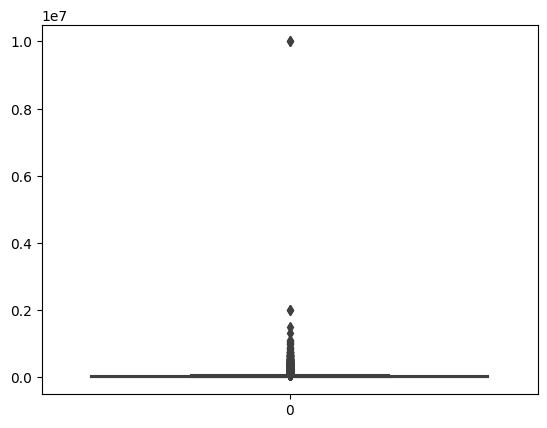

In [39]:
sns.boxplot(new_loan_data['total_rev_hi_lim'])

the boxplot is not very clear and is severly impacted by outliers. we need to perform further analysis to understand the best imputation method.

In [59]:
for index, col in enumerate(focus_col3):
    print(f"{index} {col}")

0 total_rev_hi_lim
1 tot_coll_amt
2 tot_cur_bal


In [16]:
# checking values/entries of numerical column

for col in focus_col3:
    print(f'\033[1mpercentage of each record in {focus_col3[0]}\033[0m')
    print(new_loan_data[focus_col3[0]].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {focus_col3[0]}\033[0m')
    print(new_loan_data[focus_col3[0]].value_counts())
    print('_____'*10, '\n')
    print(f'\033[1mstatistics of column {focus_col3[0]}\033[0m')
    print(new_loan_data[focus_col3[0]].describe())
    print('_____'*10, '\n')
    break

percentage of each record in total_rev_hi_lim
15000.0     0.351507
13500.0     0.334336
10000.0     0.332316
12000.0     0.328528
12500.0     0.326760
              ...   
29117.0     0.000253
31243.0     0.000253
84434.0     0.000253
89535.0     0.000253
479500.0    0.000253
Name: total_rev_hi_lim, Length: 14612, dtype: float64
__________________________________________________ 

value counts of column total_rev_hi_lim
15000.0     1392
13500.0     1324
10000.0     1316
12000.0     1301
12500.0     1294
            ... 
29117.0        1
31243.0        1
84434.0        1
89535.0        1
479500.0       1
Name: total_rev_hi_lim, Length: 14612, dtype: int64
__________________________________________________ 

statistics of column total_rev_hi_lim
count    3.960090e+05
mean     3.037909e+04
std      3.724713e+04
min      0.000000e+00
25%      1.350000e+04
50%      2.280000e+04
75%      3.790000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64
_______________________________

the statistical summary of the column shows there are only few records with value greater than 3xxxx. It explains the reason behind distorted boxplot.

#### 1.5.2. tot_coll_amt: total jumlah penagihan yang terutang

<AxesSubplot: >

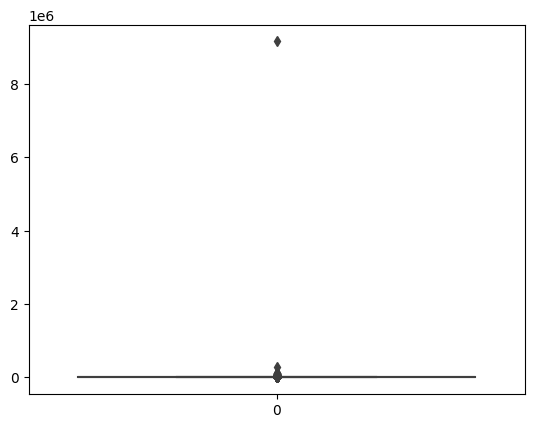

In [102]:
sns.boxplot(new_loan_data['tot_coll_amt'])

the boxplot is not very clear and is severly impacted by outliers. we need to perform further analysis to understand the best imputation method.

In [11]:
# checking values/entries of numerical column

for col in focus_col3:
    print(f'\033[1mpercentage of each record in {focus_col3[1]}\033[0m')
    print(new_loan_data[focus_col3[1]].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {focus_col3[1]}\033[0m')
    print(new_loan_data[focus_col3[1]].value_counts())
    print('_____'*10, '\n')
    print(f'\033[1mstatistics of column {focus_col3[1]}\033[0m')
    print(new_loan_data[focus_col3[1]].describe())
    print('_____'*10, '\n')
    break

percentage of each record in tot_coll_amt
0.0        87.437154
50.0        0.211359
100.0       0.164138
75.0        0.130048
60.0        0.078029
             ...    
13779.0     0.000253
15036.0     0.000253
15986.0     0.000253
2477.0      0.000253
6532.0      0.000253
Name: tot_coll_amt, Length: 6321, dtype: float64
__________________________________________________ 

value counts of column tot_coll_amt
0.0        346259
50.0          837
100.0         650
75.0          515
60.0          309
            ...  
13779.0         1
15036.0         1
15986.0         1
2477.0          1
6532.0          1
Name: tot_coll_amt, Length: 6321, dtype: int64
__________________________________________________ 

statistics of column tot_coll_amt
count    3.960090e+05
mean     1.919135e+02
std      1.463021e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64
______________________________________________

the statistical summary of the column shows there are only few records with value greater than 0. It explains the reason behind distorted boxplot.

#### 1.5.3. tot_cur_bal: total saldo saat ini dari semua akun

<AxesSubplot: >

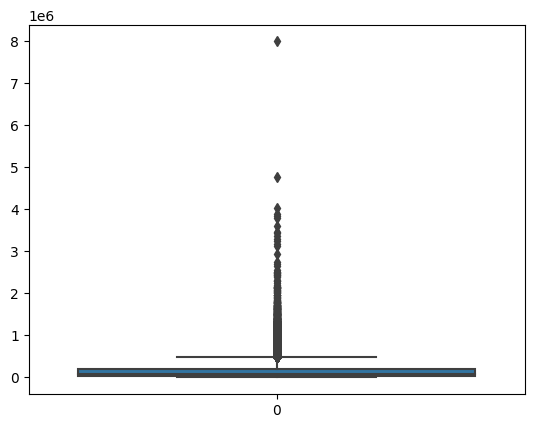

In [105]:
sns.boxplot(new_loan_data['tot_cur_bal'])

the boxplot is not very clear and is severly impacted by outliers. we need to perform further analysis to understand the best imputation method.

In [33]:
# checking values/entries of numerical column

for col in focus_col3:
    print(f'\033[1mpercentage of each record in {focus_col3[2]}\033[0m')
    print(new_loan_data[focus_col3[2]].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {focus_col3[2]}\033[0m')
    print(new_loan_data[focus_col3[2]].value_counts())
    print('_____'*10, '\n')
    print(f'\033[1mstatistics of column {focus_col3[2]}\033[0m')
    print(new_loan_data[focus_col3[2]].describe())
    print('_____'*10, '\n')
    break

percentage of each record in tot_cur_bal
0.0         0.019697
14186.0     0.003788
23254.0     0.003788
28674.0     0.003535
30491.0     0.003535
              ...   
179524.0    0.000253
217367.0    0.000253
111276.0    0.000253
260290.0    0.000253
57477.0     0.000253
Name: tot_cur_bal, Length: 220690, dtype: float64
__________________________________________________ 

value counts of column tot_cur_bal
0.0         78
14186.0     15
23254.0     15
28674.0     14
30491.0     14
            ..
179524.0     1
217367.0     1
111276.0     1
260290.0     1
57477.0      1
Name: tot_cur_bal, Length: 220690, dtype: int64
__________________________________________________ 

statistics of column tot_cur_bal
count    3.960090e+05
mean     1.388017e+05
std      1.521147e+05
min      0.000000e+00
25%      2.861800e+04
50%      8.153900e+04
75%      2.089530e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64
__________________________________________________ 



the statistical summary of the column shows there are only few records with value greater than 2. It explains the reason behind distorted boxplot.

### 1.6 understanding best imputation technique for ~48% mising values

<strong> the focus column for this analysis:

next_pymnt_d

In [14]:
focus_col4 = ['next_pymnt_d']

for col in focus_col4:
    print (f'\033[1mdata types of column {col}\033[m')
    print (new_loan_data[col].dtypes)
    print ('_____'*15, '\n')
    print (f'\033[1munique value of column {col}\033[m')
    print (new_loan_data[col].unique())
    print ('_____'*15, '\n')

data types of column next_pymnt_d
object
___________________________________________________________________________ 

unique value of column next_pymnt_d
[nan 'Feb-16' 'Jan-16' 'Sep-13' 'Feb-14' 'May-14' 'Jun-13' 'Mar-12'
 'Apr-12' 'May-13' 'Aug-12' 'Aug-13' 'Jun-12' 'Nov-13' 'Feb-12' 'Oct-11'
 'Jan-13' 'Jan-14' 'Jul-13' 'Jul-15' 'Jan-12' 'Dec-12' 'Jun-11' 'Feb-13'
 'Nov-11' 'Nov-12' 'Dec-11' 'Aug-11' 'Sep-11' 'Apr-11' 'Mar-14' 'Apr-13'
 'Mar-11' 'Jul-12' 'Aug-14' 'Oct-13' 'Sep-12' 'May-12' 'Apr-15' 'Jul-11'
 'Dec-15' 'Dec-13' 'Jan-11' 'Oct-12' 'Nov-14' 'Mar-13' 'Aug-15' 'Feb-15'
 'May-15' 'Jul-14' 'Nov-15' 'Sep-14' 'Oct-15' 'May-11' 'Feb-11' 'Dec-14'
 'Jun-15' 'Apr-14' 'Jan-15' 'Sep-15' 'Jun-14' 'Nov-10' 'Oct-10' 'Dec-10'
 'Mar-15' 'Oct-14' 'Jul-10' 'Sep-10' 'May-10' 'Aug-10' 'Mar-10' 'Jun-10'
 'Apr-10' 'Feb-10' 'Dec-09' 'Nov-09' 'Oct-09' 'Jan-10' 'Sep-09' 'Jun-09'
 'Aug-09' 'Jul-09' 'May-09' 'Apr-09' 'Jan-09' 'Oct-08' 'Feb-09' 'Nov-08'
 'Sep-08' 'Mar-09' 'Dec-08' 'Aug-08' 'Jun-08' '

In [15]:
# transform data type into datetime

from datetime import datetime, date

# convert the 'next_pymnt_d' column to datetime object
new_loan_data['next_pymnt_d'] = pd.to_datetime(new_loan_data['next_pymnt_d'], format='%b-%y')

# remove the timestamp from the 'next_pymnt_d' column
new_loan_data['copy_next_pymnt_d'] = new_loan_data['next_pymnt_d'].dt.date

In [16]:
focus_col5 = ['copy_next_pymnt_d']

In [17]:
for col in focus_col5:
    print (f'\033[1mvalue counts of column {col}\033[0m')
    print (new_loan_data[col].value_counts())
    print ('_____'*15, '\n')
    print (f'\033[1mmissing values count of column {col}\033[0m')
    print (new_loan_data[col].isnull().sum())
    print ('_____'*15, '\n')

value counts of column copy_next_pymnt_d
2016-02-01    208393
2016-01-01     27922
2011-03-01       107
2011-04-01       101
2011-02-01        91
2011-01-01        79
2011-05-01        77
2010-12-01        71
2011-06-01        66
2011-09-01        63
2011-08-01        57
2010-11-01        55
2010-08-01        54
2009-12-01        53
2009-10-01        53
2011-07-01        53
2010-09-01        53
2009-11-01        52
2008-12-01        51
2012-04-01        49
2010-07-01        49
2010-03-01        49
2012-05-01        48
2010-10-01        48
2012-03-01        48
2011-10-01        47
2012-10-01        47
2012-01-01        45
2011-12-01        43
2013-04-01        43
2013-02-01        42
2013-05-01        42
2012-06-01        40
2013-03-01        40
2011-11-01        36
2012-12-01        36
2012-11-01        35
2012-07-01        34
2013-10-01        34
2012-09-01        33
2009-08-01        32
2013-06-01        32
2010-04-01        31
2012-08-01        31
2013-01-01        29
2010-05-01    

In [18]:
before_next_pymnt = pd.DataFrame(loan_data['next_pymnt_d'].tail(6))

In [19]:
after_next_pymnt = pd.DataFrame(new_loan_data['copy_next_pymnt_d'].tail(6))

In [20]:
display (before_next_pymnt, after_next_pymnt)

,next_pymnt_d
466279,Feb-16
466280,Feb-16
466281,NaN
466282,Feb-16
466283,NaN
466284,Feb-16


,copy_next_pymnt_d
466279,2016-02-01
466280,2016-02-01
466281,NaT
466282,2016-02-01
466283,NaT
466284,2016-02-01


In [18]:
new_loan_data.to_csv('new_loan.csv')

In [3]:
df = pd.read_csv('new_loan.csv')

KeyError: 'funded_amt_inv'

### 1.7 checking the data type of columns and  fixing the incorrect data types

#### 1.7.1 object

In [3]:
df.select_dtypes(include='object')

,term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,copy_next_pymnt_d
0,36 months,B,B2,Other,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL,NaN
1,60 months,C,C4,Other,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL,NaN
2,36 months,C,C5,Other,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL,NaN
3,36 months,C,C1,Other,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL,NaN
4,60 months,B,B5,Other,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,2016-02-01,Jan-16,INDIVIDUAL,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,C2,Other,MORTGAGE,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,773xx,TX,Apr-03,w,Jan-16,2016-02-01,Jan-16,INDIVIDUAL,2016-02-01
466281,60 months,D,D5,Other,MORTGAGE,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,377xx,TN,Jun-97,f,Dec-14,NaN,Jan-16,INDIVIDUAL,NaN
466282,60 months,D,D1,Other,MORTGAGE,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,458xx,OH,Dec-01,f,Jan-16,2016-02-01,Dec-15,INDIVIDUAL,2016-02-01
466283,36 months,A,A4,Other,OWN,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,913xx,CA,Feb-03,w,Dec-14,NaN,Apr-15,INDIVIDUAL,NaN


##### treatment for column: term

In [20]:
# checking unique value for term column
# objective: mapping column into integer data type

df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [3]:
# transform 'term' column into integer data type using mapping method

mapping_term = {
    ' 36 months': 60,
    ' 60 months': 36
}

df['term'] = df['term'].map(mapping_term)
df['term'].unique()

array([60, 36], dtype=int64)

##### treatment for columns: grade & sub_grade

the columns of grade and sub_grade are filled with the exact contents that match with the dictionary. that are the categorical data indeed.

In [4]:
# checking values of DataFrame

focus_col6 = ['grade', 'sub_grade']

for col in focus_col6:
    print (f'\033[1mvalue counts of column {col}\033[0m')
    print (df[col].value_counts())
    print ('_____'*10, '\n')

value counts of column grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
__________________________________________________ 

value counts of column sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64
__________________________________________________ 



In [5]:
onehots = pd.get_dummies(df['grade'], prefix='grade')
df = df.join(onehots)

In [6]:
df = df.drop(columns=['grade'])
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,copy_next_pymnt_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1077501,1296599,5000,5000,4975.0,60,10.65,162.87,B2,Other,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
1,1,1077430,1314167,2500,2500,2500.0,36,15.27,59.83,C4,Other,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0
2,2,1077175,1313524,2400,2400,2400.0,60,15.96,84.33,C5,Other,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0
3,3,1076863,1277178,10000,10000,10000.0,60,13.49,339.31,C1,Other,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0
4,4,1075358,1311748,3000,3000,3000.0,36,12.69,67.79,B5,Other,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,2016-02-01,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,2016-02-01,0,1,0,0,0,0,0


##### treatment for column: emp_length 

the column of emp_length had been changed into numerical data using mapping method

* [1.4 understanding best imputation technique for ~5% mising values](#1)

##### treatment for column: emp_title

In [7]:
onehots = pd.get_dummies(df['emp_title'], prefix='emp_title')
df = df.join(onehots)

In [8]:
df = df.drop(columns=['emp_title'])
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,copy_next_pymnt_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_title_Manager,emp_title_Other,emp_title_RN,emp_title_Registered Nurse,emp_title_Supervisor,emp_title_Teacher
0,0,1077501,1296599,5000,5000,4975.0,60,10.65,162.87,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1077430,1314167,2500,2500,2500.0,36,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2,1077175,1313524,2400,2400,2400.0,60,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0
3,3,1076863,1277178,10000,10000,10000.0,60,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0
4,4,1075358,1311748,3000,3000,3000.0,36,12.69,67.79,B5,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,2016-02-01,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,2016-02-01,0,1,0,0,0,0,0,0,1,0,0,0,0


##### treatment for columns: home_ownership & verification_status

In [9]:
# checking unique value of DataFrame

focus_col7 = ['home_ownership', 'verification_status']

for col in focus_col7:
    print (f'\033[1munique value of column {col}\033[0m')
    print (df[col].unique())
    print ('_____'*10, '\n')

unique value of column home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
__________________________________________________ 

unique value of column verification_status
['Verified' 'Source Verified' 'Not Verified']
__________________________________________________ 



In [10]:
for cat in focus_col7:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [11]:
df = df.drop(columns=['home_ownership', 'verification_status'])
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,copy_next_pymnt_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_title_Manager,emp_title_Other,emp_title_RN,emp_title_Registered Nurse,emp_title_Supervisor,emp_title_Teacher,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1077501,1296599,5000,5000,4975.0,60,10.65,162.87,B2,10.0,24000.0,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1077430,1314167,2500,2500,2500.0,36,15.27,59.83,C4,0.0,30000.0,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,2,1077175,1313524,2400,2400,2400.0,60,15.96,84.33,C5,10.0,12252.0,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,3,1076863,1277178,10000,10000,10000.0,60,13.49,339.31,C1,10.0,49200.0,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,4,1075358,1311748,3000,3000,3000.0,36,12.69,67.79,B5,1.0,80000.0,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,2016-02-01,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,2016-02-01,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


##### treatment for column: issue_d

issue_d: the month which the loan was funded

In [40]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [12]:
# transform type data to date

# convert the 'issue_d' column to datetime object
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# remove the timestamp from the 'issue_d' column
#df['copy_issue_d'] = df['issue_d'].dt.date

In [10]:
before_issue_d = pd.DataFrame(loan_data['issue_d'].head(6))

In [11]:
after_issue_d = pd.DataFrame(df['issue_d'].head(6))

In [12]:
display(before_issue_d, after_issue_d)

,issue_d
0,Dec-11
1,Dec-11
2,Dec-11
3,Dec-11
4,Dec-11
5,Dec-11


,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01
5,2011-12-01


In [13]:
# calculates the measure elapsed months between end_date and start_date
# assume today is 2017-01-01 as end_date
# issue_d as start_date

# create a new column filled with 2017-01-01 as constant value that suited the index 
df['end_date'] = pd.Series(['2017-01-01' for x in range(len(df.index))])

# convert end_date into datetime data type
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m')

In [12]:
# read end_date column
pd.DataFrame(df['end_date'])

,end_date
0,2017-01-01
1,2017-01-01
2,2017-01-01
3,2017-01-01
4,2017-01-01
...,...
466280,2017-01-01
466281,2017-01-01
466282,2017-01-01
466283,2017-01-01


In [14]:
# calculate elapsed months between date of end_date and issue_d
import datetime

df['mnths_since_issue_d'] = (df.end_date.dt.year - df.issue_d.dt.year)*12 + (df.end_date.dt.month - df.issue_d.dt.month)

#read elapsed months column
pd.DataFrame(df['mnths_since_issue_d'])

,mnths_since_issue_d
0,61
1,61
2,61
3,61
4,61
...,...
466280,36
466281,36
466282,36
466283,36


##### treatment for column: loan_status

In [29]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [15]:
# mapping 'loan_status' class with good loan and poor loan 
# good loan mapped as 1
# poor loan mapped as 0 
# good loan consists of: Fully Paid, Current, In Grace Period, Late (16 - 30 days) and Does not meet the credit policy: Fully Paid
# poor loan consists of: Charged Off, Default, Late (31-120 days) and Does not meet the credit policy: Charged Off

mapping_loan_status = {
    'Fully Paid':1,
    'Current':1,
    'In Grace Period':1,
    'Late (16-30 days)':1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Charged Off':0,
    'Default':0,
    'Late (31-120 days)':0,
    'Does not meet the credit policy. Status:Charged Off':0
}

In [16]:
df['loan_status'] = df['loan_status'].map(mapping_loan_status)
df['loan_status'].unique()

array([1, 0], dtype=int64)

##### treatment for column: pymnt_plan

In [18]:
focus_col8 = ['pymnt_plan']

for col in focus_col8:
    print (f'\033[1mvalue counts of column {col}\033[0m')
    print (df[col].value_counts())
    print ('_____'*10, '\n')
    print (f'\033[1mpercentage of value counts in column {col}\033[0m')
    print (df[col].value_counts(normalize=True)*100)

value counts of column pymnt_plan
n    466276
y         9
Name: pymnt_plan, dtype: int64
__________________________________________________ 

percentage of value counts in column pymnt_plan
n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


##### treatment for column: url

In [38]:
df['url'].unique()

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175',
       ...,
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9584776',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9604874',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=9199665'],
      dtype=object)

we can consider to drop 'url' column because it doesn't fit to support this analysis.

##### treatment for column: purpose

purpose: a category provided by the borrower for the loan request

In [42]:
df['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

this column might be support this analysis to predict the capability of the borrower to paid their loan. so, we need to encodes with one-hots method. 

In [17]:
focus_col9 = ['purpose']

for cat in focus_col9:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [18]:
df = df.drop(columns=['purpose'])
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,url,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,copy_next_pymnt_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_title_Manager,emp_title_Other,emp_title_RN,emp_title_Registered Nurse,emp_title_Supervisor,emp_title_Teacher,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,end_date,mnths_since_issue_d,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,1077501,1296599,5000,5000,4975.0,60,10.65,162.87,B2,10.0,24000.0,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2017-01-01,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1077430,1314167,2500,2500,2500.0,36,15.27,59.83,C4,0.0,30000.0,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,2017-01-01,61,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1077175,1313524,2400,2400,2400.0,60,15.96,84.33,C5,10.0,12252.0,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,2017-01-01,61,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,1076863,1277178,10000,10000,10000.0,60,13.49,339.31,C1,10.0,49200.0,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,2017-01-01,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,1075358,1311748,3000,3000,3000.0,36,12.69,67.79,B5,1.0,80000.0,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,2016-02-01,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,2016-02-01,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,2017-01-01,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0


##### treatment for column: title

title: the loan title provided by the borrower

In [40]:
df['title'].value_counts()

Debt consolidation                   164075
Credit card refinancing               62275
Debt Consolidation                    15760
Home improvement                      14849
Other                                 12713
                                      ...  
Credit Card Clearance                     1
credit repayment                          1
medical bills/credit card payoff          1
One Time Only Relief!                     1
Paying off the car and some bills         1
Name: title, Length: 63099, dtype: int64

##### treatment for column: zip_code

In [47]:
df['zip_code'].value_counts()

945xx    5304
112xx    5102
750xx    5013
606xx    4696
100xx    4391
         ... 
204xx       1
502xx       1
514xx       1
049xx       1
901xx       1
Name: zip_code, Length: 888, dtype: int64

##### treatment for column: addr_state

In [48]:
df['addr_state'].value_counts()

CA    71450
NY    40242
TX    36439
FL    31637
IL    18612
NJ    18061
PA    16424
OH    15237
GA    14975
VA    14222
NC    12682
MI    11549
MA    11072
MD    10974
AZ    10712
WA    10517
CO     9739
MN     8158
MO     7508
CT     7204
IN     6525
NV     6519
TN     5984
OR     5949
WI     5911
AL     5853
SC     5583
LA     5489
KY     4438
KS     4190
OK     4117
AR     3488
UT     3428
NM     2588
HI     2487
WV     2412
NH     2232
RI     2050
DC     1426
MT     1396
DE     1272
AK     1251
MS     1226
WY     1128
SD      980
VT      905
IA       14
NE       14
ID       12
ME        4
Name: addr_state, dtype: int64

In [19]:
focus_col10 = ['addr_state']

for cat in focus_col10:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [20]:
df = df.drop(columns=['addr_state'])

##### treatment for columns: earliest_cr_line, last_pymnt_d, and last_credit_pull_d

In [21]:
focus_col11 = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [53]:
for col in focus_col11:
    print (f'unique value of column \033[1m{col}\033[0m')
    print (df[col].unique())
    print ('____'*10, '\n')

unique value of column earliest_cr_line
['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98'
 'Dec-04' 'Oct-00' 'May-02' 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05'
 'Apr-95' 'Oct-02' 'Jan-00' 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99'
 'Nov-03' 'Jun-89' 'Jun-03' 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96'
 'Feb-84' 'Sep-02' 'Jan-86' 'May-98' 'Jan-97' 'Jun-05' 'Feb-90' 'Mar-04'
 'Jul-95' 'Aug-94' 'Jun-92' 'Mar-97' 'Apr-06' 'Apr-90' 'Aug-99' 'Sep-00'
 'Feb-01' 'Dec-88' 'Feb-99' 'Dec-91' 'Aug-00' 'Oct-04' 'Aug-04' 'Feb-05'
 'Nov-05' 'Nov-00' 'May-07' 'Jan-91' 'Jun-00' 'Aug-06' 'Dec-02' 'Jun-93'
 'Jun-06' '

In [22]:
# transform data type into datetime

from datetime import datetime, date

# convert the column to datetime object
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [23]:
# calculates elapsed months between end_date and start_date
# assume today is 2017-01-01 as end_date
# end_date has been available in the DataFrame
# earliest_cr_line, last_pymnt_d, and last_credit_pull_d as start_date

df['mnths_since_earliest_cr_line'] = (df.end_date.dt.year - df.earliest_cr_line.dt.year)*12 + (df.end_date.dt.month - df.earliest_cr_line.dt.month)
df['mnths_since_last_pymnt_d'] = (df.end_date.dt.year - df.last_pymnt_d.dt.year)*12 + (df.end_date.dt.month - df.last_pymnt_d.dt.month)
df['mnths_since_last_credit_pull_d'] = (df.end_date.dt.year - df.last_credit_pull_d.dt.year)*12 + (df.end_date.dt.month - df.last_credit_pull_d.dt.month)

# read each columns of elapsed months
focus_col14 = ['mnths_since_earliest_cr_line', 'mnths_since_last_pymnt_d', 'mnths_since_last_credit_pull_d']

for col in focus_col14:
    print (f'DataFrame of column \033[1m{col}\033[0m')
    print (pd.DataFrame(df[col]))
    print ('_____'*10, '\n')

DataFrame of column mnths_since_earliest_cr_line
        mnths_since_earliest_cr_line
0                              384.0
1                              213.0
2                              182.0
3                              251.0
4                              252.0
...                              ...
466280                         165.0
466281                         235.0
466282                         181.0
466283                         167.0
466284                         203.0

[466285 rows x 1 columns]
__________________________________________________ 

DataFrame of column mnths_since_last_pymnt_d
        mnths_since_last_pymnt_d
0                           24.0
1                           45.0
2                           31.0
3                           24.0
4                           12.0
...                          ...
466280                      12.0
466281                      25.0
466282                      12.0
466283                      25.0
466284             

##### treatment for column: initial_status

In [24]:
focus_col12 = ['initial_list_status']

In [30]:
df['initial_list_status'].value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

In [25]:
for cat in focus_col12:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [26]:
df = df.drop(columns=['initial_list_status'])

##### treatment for column: next_pymnt_d

In [27]:
# calculates elapsed months between end_date and start_date
# assume today is 2017-01-01 as end_date
# next_pymnt_d as start date

df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%Y-%m')
df['mnths_since_next_pymnt_d'] = (df.end_date.dt.year - df.next_pymnt_d.dt.year)*12 + (df.end_date.dt.month - df.next_pymnt_d.dt.month)

In [25]:
pd.DataFrame(df['mnths_since_next_pymnt_d'])

,mnths_since_next_pymnt_d
0,NaN
1,NaN
2,NaN
3,NaN
4,11.0
...,...
466280,11.0
466281,NaN
466282,11.0
466283,NaN


In [28]:
df = df.drop(columns=['copy_next_pymnt_d'])

##### treatment for column: application_type

In [38]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

#### 1.7.2 float

In [29]:
df.select_dtypes(include='float')

,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,mnths_since_next_pymnt_d
0,4975.0,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,NaN,NaN,NaN,384.0,24.0,12.0,NaN
1,2500.0,15.27,59.83,0.0,30000.0,1.00,0.0,5.0,3.0,0.0,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,NaN,NaN,NaN,213.0,45.0,40.0,NaN
2,2400.0,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,NaN,NaN,NaN,182.0,31.0,12.0,NaN
3,10000.0,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,NaN,NaN,NaN,251.0,24.0,24.0,NaN
4,3000.0,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,NaN,NaN,NaN,252.0,12.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400.0,14.47,432.64,4.0,110000.0,19.85,0.0,2.0,18.0,0.0,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64,0.0,0.0,0.0,294998.0,29900.0,165.0,12.0,12.0,11.0
466281,22000.0,19.97,582.50,10.0,78000.0,18.45,0.0,5.0,18.0,1.0,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50,0.0,0.0,0.0,221830.0,39400.0,235.0,25.0,12.0,NaN
466282,20700.0,16.99,514.34,7.0,46000.0,25.65,0.0,2.0,18.0,0.0,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34,0.0,0.0,0.0,73598.0,13100.0,181.0,12.0,13.0,11.0
466283,2000.0,7.90,62.59,3.0,83000.0,5.39,3.0,1.0,21.0,0.0,21.5,27.0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68,0.0,0.0,0.0,591610.0,53100.0,167.0,25.0,21.0,NaN


In [29]:
# identifying columns that have .0 in the behind of each record
# so we can transform into integer without changing the real value of dataset

focus_col13 = ['emp_length','inq_last_6mths', 'delinq_2yrs', 'annual_inc', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim', 'mnths_since_earliest_cr_line', 'mnths_since_last_pymnt_d', 'mnths_since_last_credit_pull_d', 'mnths_since_next_pymnt_d']

In [30]:
# checking the value counts in each column

for col in focus_col13:
    print (f'value counts of column \033[1m{col}\033[0m')
    print (df[col].value_counts())
    print('_____'*10, '\n')

value counts of column emp_length
10.0    150049
2.0      41373
3.0      36596
0.0      36265
5.0      30774
1.0      29622
4.0      28023
7.0      26180
6.0      26112
8.0      22395
9.0      17888
Name: emp_length, dtype: int64
__________________________________________________ 

value counts of column inq_last_6mths
0.0     241498
1.0     130148
2.0      57825
3.0      25126
4.0       7241
5.0       2768
6.0       1188
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
13.0         6
14.0         6
18.0         4
16.0         3
17.0         2
24.0         2
19.0         2
32.0         1
33.0         1
31.0         1
28.0         1
25.0         1
27.0         1
20.0         1
Name: inq_last_6mths, dtype: int64
__________________________________________________ 

value counts of column delinq_2yrs
0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9

In [31]:
# transform data type into integer

df[focus_col13] = df[focus_col13].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

handling missing values for columns in focus_col13

In [32]:
# checking the percentage of missing values in each column

for col in focus_col13:
    print (f'percentage of missing values in column \033[1m{col}\033[m')
    print (round(100.0* df[col].isnull().sum()/len(df[col]), 2))
    print('_____'*10, '\n')

percentage of missing values in column emp_length
4.51
__________________________________________________ 

percentage of missing values in column inq_last_6mths
0.01
__________________________________________________ 

percentage of missing values in column delinq_2yrs
0.01
__________________________________________________ 

percentage of missing values in column annual_inc
0.0
__________________________________________________ 

percentage of missing values in column open_acc
0.01
__________________________________________________ 

percentage of missing values in column pub_rec
0.01
__________________________________________________ 

percentage of missing values in column revol_util
0.07
__________________________________________________ 

percentage of missing values in column total_acc
0.01
__________________________________________________ 

percentage of missing values in column collections_12_mths_ex_med
0.03
__________________________________________________ 

percentage of 

##### treatment for column: emp_length
checking the outliers of emp_length

<AxesSubplot: >

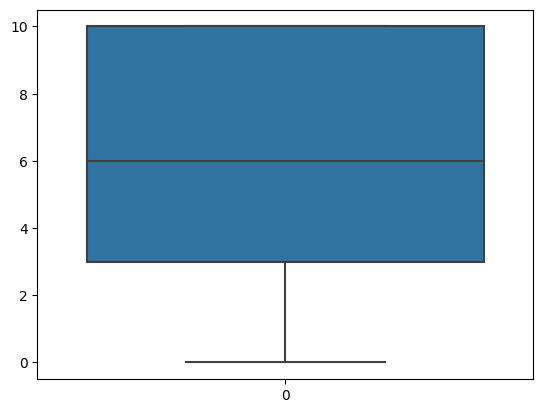

In [53]:
sns.boxplot(df['emp_length'])

In [56]:
print(f'percentage of each record in \033[1memp_length\033[0m')
print(df['emp_length'].value_counts(normalize=True)*100)
print('_____'*10, '\n')
print(f'statistics of column \033[1memp_length\033[0m')
print(df['emp_length'].describe())

percentage of each record in emp_length
10.0    33.697900
2.0      9.291520
3.0      8.218704
0.0      8.144369
5.0      6.911204
1.0      6.652488
4.0      6.293386
7.0      5.879486
6.0      5.864215
8.0      5.029454
9.0      4.017275
Name: emp_length, dtype: float64
__________________________________________________ 

statistics of column emp_length
count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64


In [43]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mean())

In [44]:
df['emp_length'].isnull().sum()

0

##### treatment for column: inq_last_6mths

<AxesSubplot: >

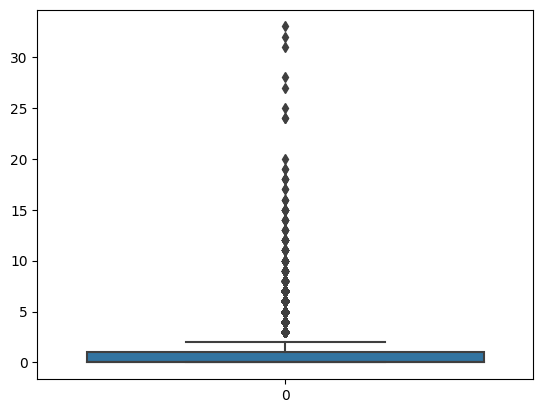

In [58]:
sns.boxplot(df['inq_last_6mths'])

In [59]:
print(f'percentage of each record in \033[1meinq_last_6mths\033[0m')
print(df['inq_last_6mths'].value_counts(normalize=True)*100)
print('_____'*10, '\n')
print(f'statistics of column \033[1minq_last_6mths\033[0m')
print(df['inq_last_6mths'].describe())

percentage of each record in einq_last_6mths
0.0     51.795151
1.0     27.913421
2.0     12.401985
3.0      5.388885
4.0      1.553010
5.0      0.593665
6.0      0.254796
7.0      0.041823
8.0      0.026166
9.0      0.010724
10.0     0.005147
11.0     0.003217
12.0     0.003217
15.0     0.001930
13.0     0.001287
14.0     0.001287
18.0     0.000858
16.0     0.000643
17.0     0.000429
24.0     0.000429
19.0     0.000429
32.0     0.000214
33.0     0.000214
31.0     0.000214
28.0     0.000214
25.0     0.000214
27.0     0.000214
20.0     0.000214
Name: inq_last_6mths, dtype: float64
__________________________________________________ 

statistics of column inq_last_6mths
count    466256.000000
mean          0.804745
std           1.091598
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64


In [45]:
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(df['inq_last_6mths'].median())

In [46]:
df['inq_last_6mths'].isnull().sum()

0

##### treatment for column: delinq_2yrs

<AxesSubplot: >

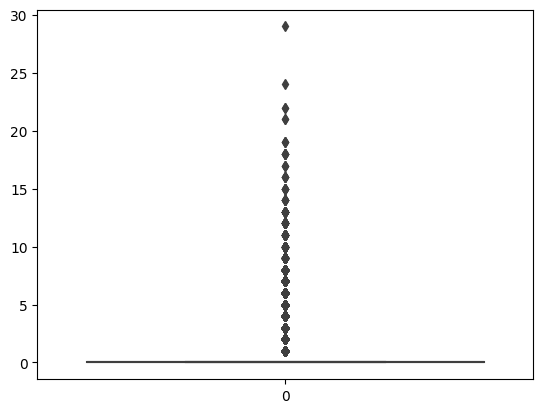

In [35]:
sns.boxplot(df['delinq_2yrs'])

In [36]:
print(f'percentage of each record in \033[1mdelinq_2yrs\033[0m')
print(df['delinq_2yrs'].value_counts(normalize=True)*100)
print('_____'*10, '\n')
print(f'statistics of column \033[1mdelinq_2yrs\033[0m')
print(df['delinq_2yrs'].describe())

percentage of each record in delinq_2yrs
0.0     82.133849
1.0     12.058612
2.0      3.498078
3.0      1.219073
4.0      0.510020
5.0      0.265090
6.0      0.134904
7.0      0.074208
8.0      0.037962
9.0      0.023807
10.0     0.013941
11.0     0.008793
12.0     0.008150
13.0     0.005362
14.0     0.001716
15.0     0.001501
18.0     0.001287
16.0     0.001072
17.0     0.000643
19.0     0.000643
21.0     0.000429
22.0     0.000429
29.0     0.000214
24.0     0.000214
Name: delinq_2yrs, dtype: float64
__________________________________________________ 

statistics of column delinq_2yrs
count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


In [47]:
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(df['delinq_2yrs'].median())

In [48]:
df['delinq_2yrs'].isnull().sum()

0

##### treatment for columns: 
'annual_inc', 'open_acc', 'pub_rec', <br/>
'total_acc', 'collections_12_mths_ex_med', <br/>
'acc_now_delinq','tot_coll_amt', 'tot_cur_bal',<br/>
'total_rev_hi_lim', 'mnths_since_earliest_cr_line', <br/>
'mnths_since_last_pymnt_d','mnths_since_last_credit_pull_d',<br/>
'mnths_since_next_pymnt_d'<br/>

In [33]:
focus_col15 = ['annual_inc', 'open_acc', 'pub_rec','revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim', 'mnths_since_earliest_cr_line', 'mnths_since_last_pymnt_d', 'mnths_since_last_credit_pull_d', 'mnths_since_next_pymnt_d']

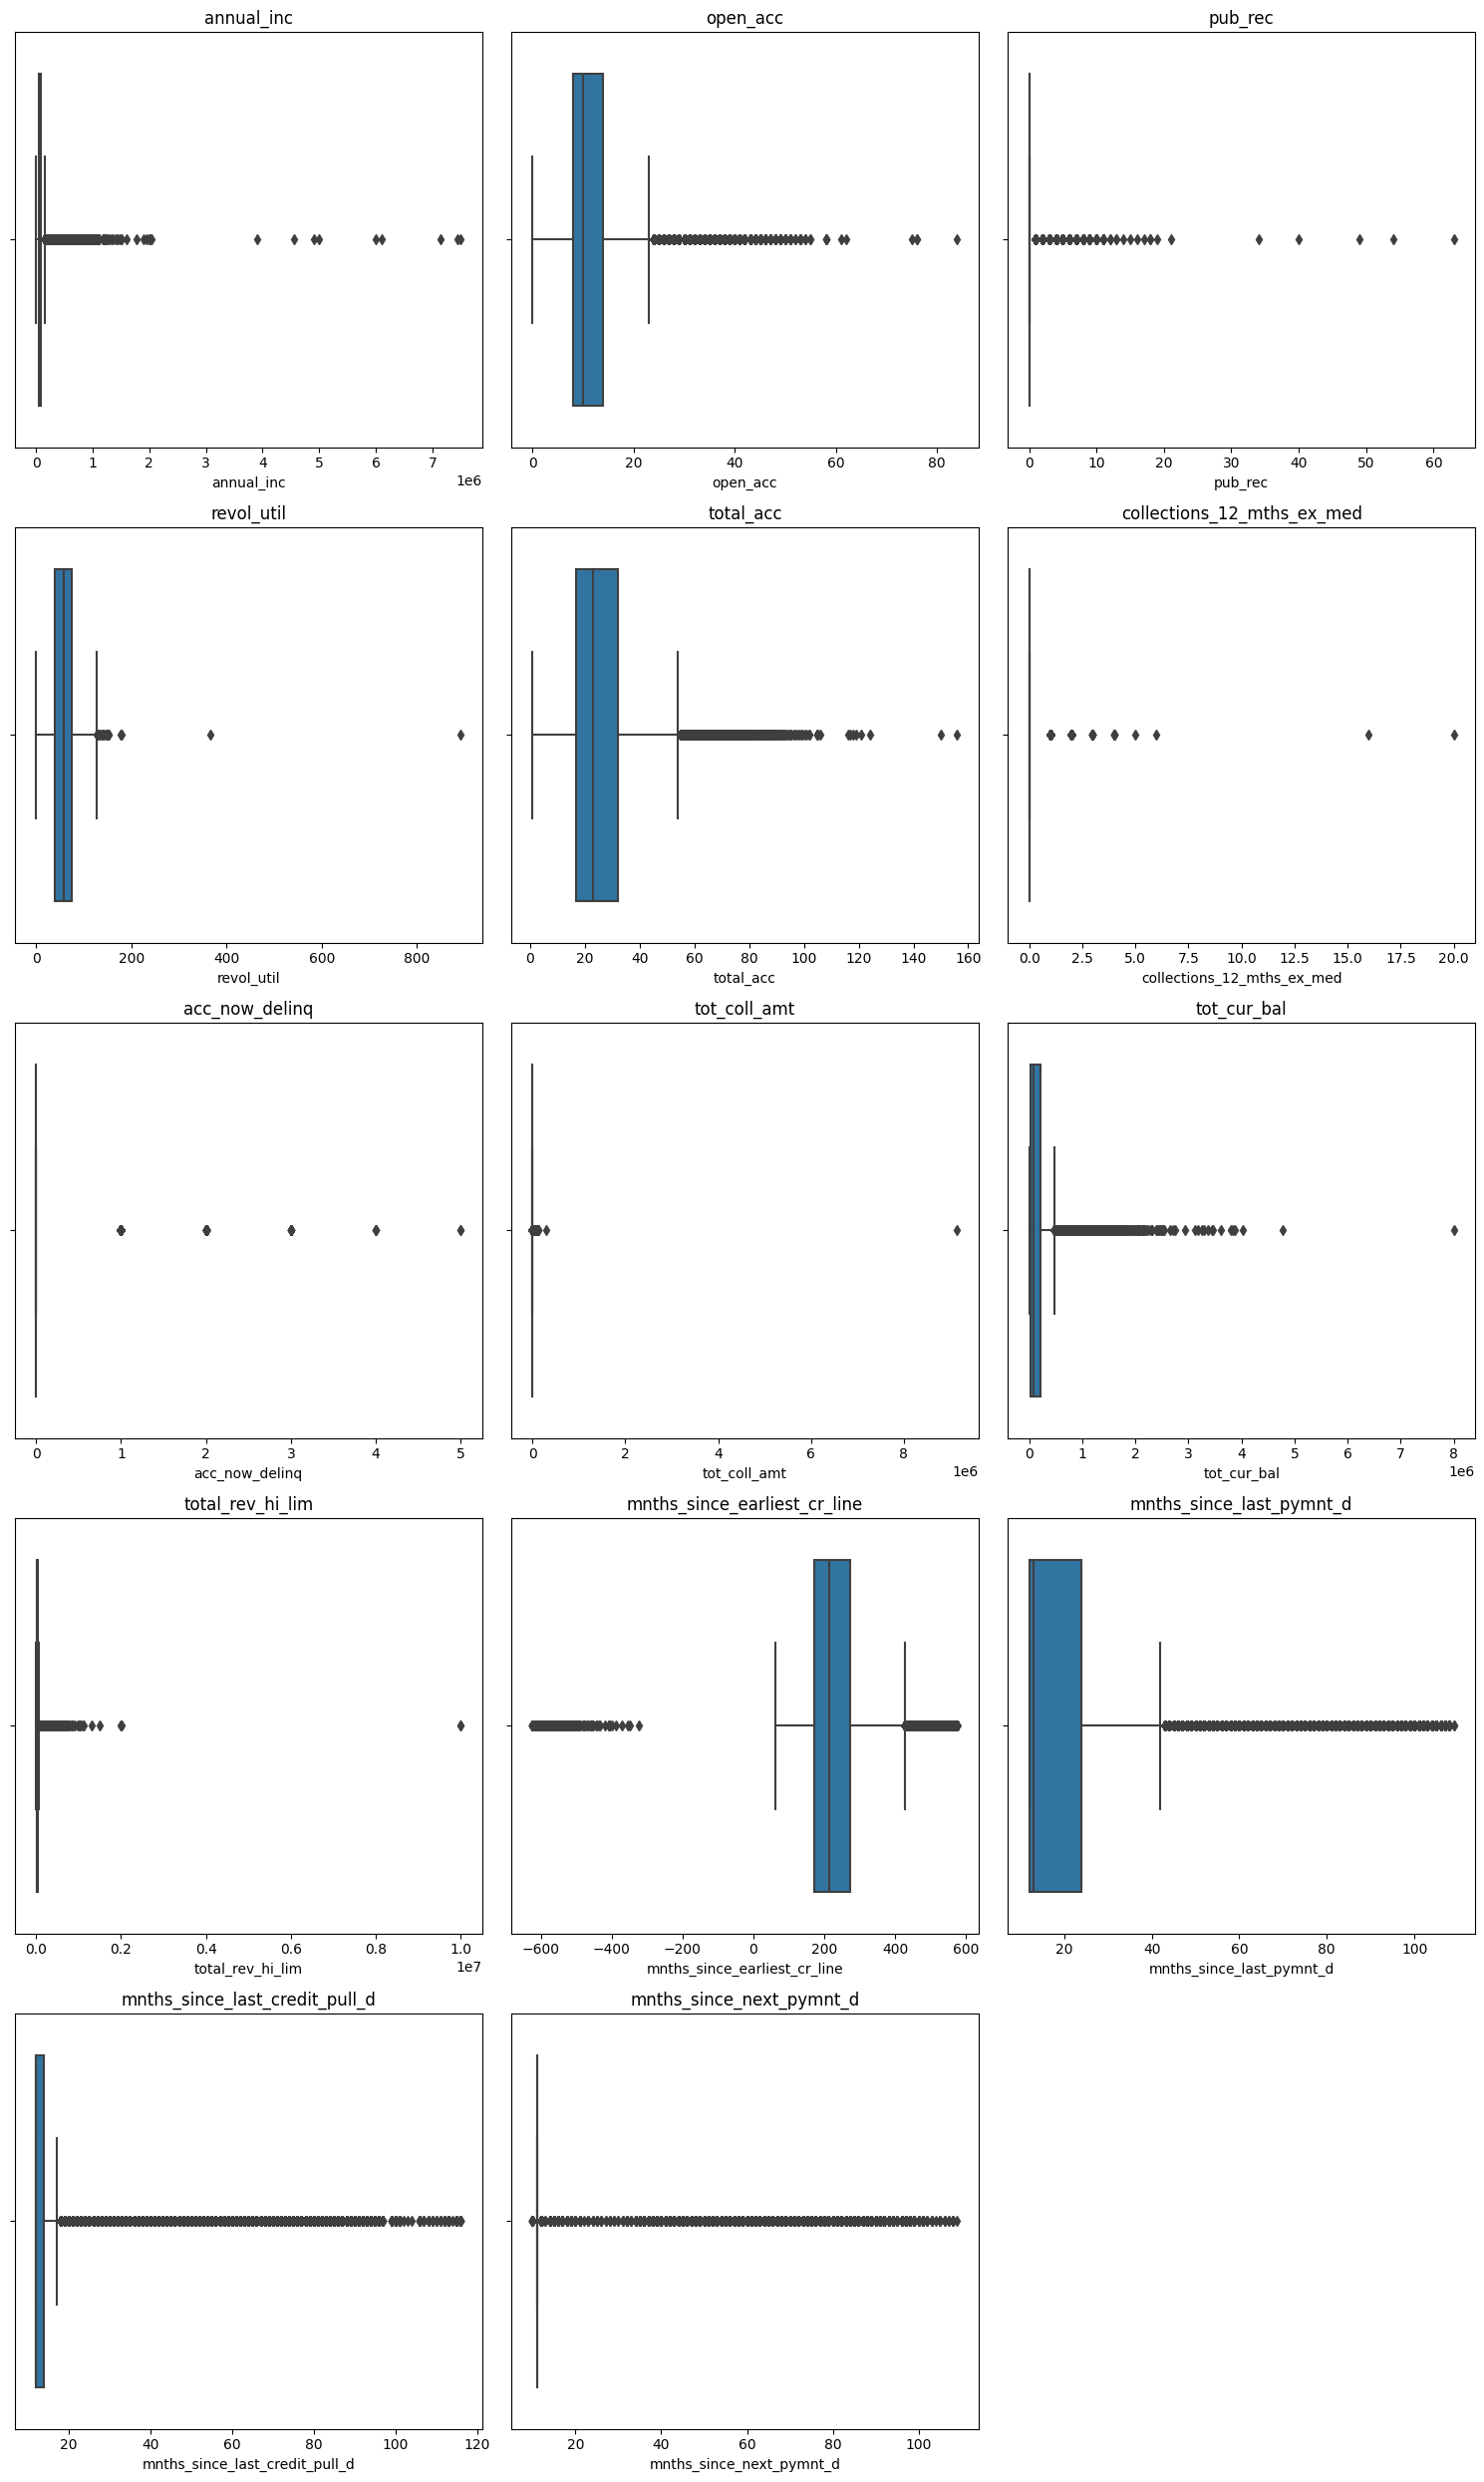

In [34]:
# create a figure with subplots
num_col = len(focus_col15)
num_row = (num_col + 7) // 4
fig, axes = plt.subplots(nrows=num_row, ncols=3, figsize=(15, 5*num_row))
axes = axes.flatten()

# create a boxplot for each numerical variable using seaborn
for i, col in enumerate(focus_col15):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    
# remove any extra empty subplots if needed
if num_col < len(axes):
    for i in range(num_col, len(axes)):
        fig.delaxes(axes[i])
        
# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [35]:
for col in focus_col15:
    print(df[focus_col15].describe())

         annual_inc       open_acc        pub_rec     revol_util  \
count  4.662810e+05  466256.000000  466256.000000  465945.000000   
mean   7.327738e+04      11.187069       0.160564      56.176947   
std    5.496357e+04       4.987526       0.510863      23.732628   
min    1.896000e+03       0.000000       0.000000       0.000000   
25%    4.500000e+04       8.000000       0.000000      39.200000   
50%    6.300000e+04      10.000000       0.000000      57.600000   
75%    8.896000e+04      14.000000       0.000000      74.700000   
max    7.500000e+06      84.000000      63.000000     892.300000   

           total_acc  collections_12_mths_ex_med  acc_now_delinq  \
count  466256.000000               466140.000000   466256.000000   
mean       25.064430                    0.009085        0.004002   
std        11.600141                    0.108648        0.068637   
min         1.000000                    0.000000        0.000000   
25%        17.000000                    0.00000

In [36]:
for col in focus_col15:
    print(f'value counts of column \033[1m{col}\033[0m')
    print(df[col].value_counts())
    print('_____'*10, '\n')

value counts of column annual_inc
60000.0     17980
50000.0     15949
65000.0     13211
40000.0     12864
70000.0     12436
            ...  
93548.0         1
80840.0         1
257100.0        1
91660.0         1
72787.0         1
Name: annual_inc, Length: 31901, dtype: int64
__________________________________________________ 

value counts of column open_acc
9.0     44019
10.0    42512
8.0     41893
11.0    39112
7.0     37602
12.0    34585
6.0     30837
13.0    29806
14.0    24730
5.0     21544
15.0    20234
16.0    16809
17.0    13392
4.0     12588
18.0    10865
19.0     8647
20.0     6668
3.0      5500
21.0     5279
22.0     4097
23.0     3158
24.0     2452
25.0     1933
2.0      1790
26.0     1314
27.0     1067
28.0      766
29.0      624
30.0      484
31.0      358
32.0      296
33.0      222
34.0      185
35.0      157
1.0       142
36.0      126
37.0      100
38.0       78
39.0       67
40.0       39
41.0       36
42.0       29
43.0       19
45.0       18
44.0       12
49.0   

In [37]:
# missing value ~0.1%- 0.8%
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].median())
df['pub_rec'] = df['pub_rec'].fillna(df['pub_rec'].median())
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
df['total_acc'] = df['total_acc'].fillna(df['total_acc'].median())
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median())
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(df['acc_now_delinq'].median())
df['mnths_since_earliest_cr_line'] = df['mnths_since_earliest_cr_line'].fillna(df['mnths_since_earliest_cr_line'].median())
df['mnths_since_last_pymnt_d'] = df['mnths_since_last_pymnt_d'].fillna(df['mnths_since_last_pymnt_d'].median())
df['mnths_since_last_credit_pull_d'] = df['mnths_since_last_credit_pull_d'].fillna(df['mnths_since_last_credit_pull_d'].median())

# missing value ~15%
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(df['tot_coll_amt'].mode()[0])
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].mode()[0])
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].mode()[0])

# missing value ~48%
df['mnths_since_next_pymnt_d'] = df['mnths_since_next_pymnt_d'].fillna(0)

In [40]:
for col in focus_col15:
    print(f'missing value of column \033[1m{col}\033[0m')
    print(df[col].isnull().sum())
    print('_____'*10, '\n')

missing value of column annual_inc
0
__________________________________________________ 

missing value of column open_acc
0
__________________________________________________ 

missing value of column pub_rec
0
__________________________________________________ 

missing value of column revol_util
0
__________________________________________________ 

missing value of column total_acc
0
__________________________________________________ 

missing value of column collections_12_mths_ex_med
0
__________________________________________________ 

missing value of column acc_now_delinq
0
__________________________________________________ 

missing value of column tot_coll_amt
0
__________________________________________________ 

missing value of column tot_cur_bal
0
__________________________________________________ 

missing value of column total_rev_hi_lim
0
__________________________________________________ 

missing value of column mnths_since_earliest_cr_line
0
______________________

In [49]:
# transform data type into integer

focus_col16 = ['emp_length','inq_last_6mths', 'delinq_2yrs', 'annual_inc', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim', 'mnths_since_earliest_cr_line', 'mnths_since_last_pymnt_d', 'mnths_since_last_credit_pull_d', 'mnths_since_next_pymnt_d']
df[focus_col16] = df[focus_col16].astype('int')

In [52]:
df.select_dtypes(include='float')

,funded_amnt_inv,int_rate,installment,dti,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,4975.0,10.65,162.87,27.65,83.7,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62
1,2500.0,15.27,59.83,1.00,9.4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400.0,15.96,84.33,8.72,98.5,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91
3,10000.0,13.49,339.31,20.00,21.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48
4,3000.0,12.69,67.79,17.94,53.9,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400.0,14.47,432.64,19.85,77.6,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64
466281,22000.0,19.97,582.50,18.45,46.3,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50
466282,20700.0,16.99,514.34,25.65,51.1,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34
466283,2000.0,7.90,62.59,5.39,21.5,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68


#### 1.7.3 integer

In [43]:
df.select_dtypes(include='int')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,term,emp_length,annual_inc,loan_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mnths_since_issue_d,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,mnths_since_next_pymnt_d
0,0,1077501,1296599,5000,5000,60,10,24000,1,0,1,3,0,13648,9,0,1,0,0,0,15000,61,384,24,12,0
1,1,1077430,1314167,2500,2500,36,0,30000,0,0,5,3,0,1687,4,0,1,0,0,0,15000,61,213,45,40,0
2,2,1077175,1313524,2400,2400,60,10,12252,1,0,2,2,0,2956,10,0,1,0,0,0,15000,61,182,31,12,0
3,3,1076863,1277178,10000,10000,60,10,49200,1,0,1,10,0,5598,37,0,1,0,0,0,15000,61,251,24,24,0
4,4,1075358,1311748,3000,3000,36,1,80000,1,0,0,15,0,27783,38,0,1,0,0,0,15000,61,252,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,36,4,110000,1,0,2,18,0,23208,36,0,1,0,0,294998,29900,36,165,12,12,11
466281,466281,9684700,11536848,22000,22000,36,10,78000,0,0,5,18,1,18238,30,0,1,0,0,221830,39400,36,235,25,12,0
466282,466282,9584776,11436914,20700,20700,36,7,46000,1,0,2,18,0,6688,43,0,1,0,0,73598,13100,36,181,12,13,11
466283,466283,9604874,11457002,2000,2000,60,3,83000,1,3,1,21,0,11404,27,0,1,0,0,591610,53100,36,167,25,21,0


In [41]:
df['policy_code'].value_counts()

1    466285
Name: policy_code, dtype: int64

### 1.8 removing irrelevant columns

In [53]:
# list of columns that would be dropped
drop_col = ['sub_grade','pymnt_plan','url','zip_code','title','application_type','policy_code','id','member_id','issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','end_date']

# define a new dataframe 
new_df = df.drop(columns=drop_col, axis=1)
new_df.drop('Unnamed: 0', axis=1, inplace=True)
new_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_title_Manager,emp_title_Other,emp_title_RN,emp_title_Registered Nurse,emp_title_Supervisor,emp_title_Teacher,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,mnths_since_issue_d,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,initial_list_status_f,initial_list_status_w,mnths_since_next_pymnt_d
0,5000,5000,4975.0,60,10.65,162.87,10,24000,1,27.65,0,1,3,0,13648,83.7,9,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0,0,0,0,15000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,384,24,12,1,0,0
1,2500,2500,2500.0,36,15.27,59.83,0,30000,0,1.00,0,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0,0,0,0,15000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,45,40,1,0,0
2,2400,2400,2400.0,60,15.96,84.33,10,12252,1,8.72,0,2,2,0,2956,98.5,10,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0,0,0,0,15000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,61,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182,31,12,1,0,0
3,10000,10000,10000.0,60,13.49,339.31,10,49200,1,20.00,0,1,10,0,5598,21.0,37,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0,0,0,0,15000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,251,24,24,1,0,0
4,3000,3000,3000.0,36,12.69,67.79,1,80000,1,17.94,0,0,15,0,27783,53.9,38,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0,0,0,0,15000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,252,12,12,1,0,11


In [54]:
new_df.to_csv('idxpartners_loan.csv')

In [3]:
df_clean = pd.read_csv('idxpartners_loan.csv')
df_clean.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_title_Manager,emp_title_Other,emp_title_RN,emp_title_Registered Nurse,emp_title_Supervisor,emp_title_Teacher,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,mnths_since_issue_d,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,initial_list_status_f,initial_list_status_w,mnths_since_next_pymnt_d
0,0,5000,5000,4975.0,60,10.65,162.87,10,24000,1,27.65,0,1,3,0,13648,83.7,9,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0,0,0,0,15000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,61,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,384,24,12,1,0,0
1,1,2500,2500,2500.0,36,15.27,59.83,0,30000,0,1.00,0,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0,0,0,0,15000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,61,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,45,40,1,0,0
2,2,2400,2400,2400.0,60,15.96,84.33,10,12252,1,8.72,0,2,2,0,2956,98.5,10,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0,0,0,0,15000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,61,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182,31,12,1,0,0
3,3,10000,10000,10000.0,60,13.49,339.31,10,49200,1,20.00,0,1,10,0,5598,21.0,37,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0,0,0,0,15000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,61,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,251,24,24,1,0,0
4,4,3000,3000,3000.0,36,12.69,67.79,1,80000,1,17.94,0,0,15,0,27783,53.9,38,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0,0,0,0,15000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,61,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,252,12,12,1,0,11


In [4]:
df_clean.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df_clean.shape

(466285, 125)

### 1.9 normalization

min-max scaler method

In [6]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(df_clean)
df_scaled=model.transform(df_clean)
 
# print scaled features
print(df_scaled)

[[0.13043478 0.13043478 0.14214286 ... 1.         0.         0.        ]
 [0.05797101 0.05797101 0.07142857 ... 1.         0.         0.        ]
 [0.05507246 0.05507246 0.06857143 ... 1.         0.         0.        ]
 ...
 [0.58550725 0.58550725 0.59142857 ... 1.         0.         0.10091743]
 [0.04347826 0.04347826 0.05714286 ... 0.         1.         0.        ]
 [0.27536232 0.27536232 0.285      ... 1.         0.         0.10091743]]


In [7]:
df_scaled = pd.DataFrame(df_scaled, index=df_clean.index, columns=df_clean.columns)
df_scaled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_title_Manager,emp_title_Other,emp_title_RN,emp_title_Registered Nurse,emp_title_Supervisor,emp_title_Teacher,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,mnths_since_issue_d,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,initial_list_status_f,initial_list_status_w,mnths_since_next_pymnt_d
0,0.130435,0.130435,0.142143,1.0,0.253391,0.105571,1.0,0.002948,1.0,0.691423,0.000000,0.030303,0.035714,0.000000,0.005313,0.093803,0.051613,0.000000,0.000000,0.101442,0.100935,0.142857,0.035573,0.000000,0.000000,0.000000,0.004736,0.0,0.0,0.0,0.000000,0.00150,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.839867,0.123711,0.000000,1.0,0.0,0.000000
1,0.057971,0.057971,0.071429,0.0,0.477229,0.031671,0.0,0.003748,0.0,0.025006,0.000000,0.151515,0.035714,0.000000,0.000657,0.010535,0.019355,0.000000,0.000000,0.017459,0.017459,0.013042,0.017978,0.000000,0.003493,0.000159,0.003302,0.0,0.0,0.0,0.000000,0.00150,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.400000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.697248,0.340206,0.269231,1.0,0.0,0.000000
2,0.055072,0.055072,0.068571,1.0,0.510659,0.049243,1.0,0.001381,1.0,0.218055,0.000000,0.060606,0.023810,0.000000,0.001151,0.110389,0.058065,0.000000,0.000000,0.051986,0.051986,0.068571,0.024938,0.000000,0.000000,0.000000,0.017936,0.0,0.0,0.0,0.000000,0.00150,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.671393,0.195876,0.000000,1.0,0.0,0.000000
3,0.275362,0.275362,0.285714,1.0,0.390988,0.232113,1.0,0.006309,1.0,0.500125,0.000000,0

### 1.10 balanced data class

focus: column of 'loan_status' column

1.0    415317
0.0     50968
Name: loan_status, dtype: int64

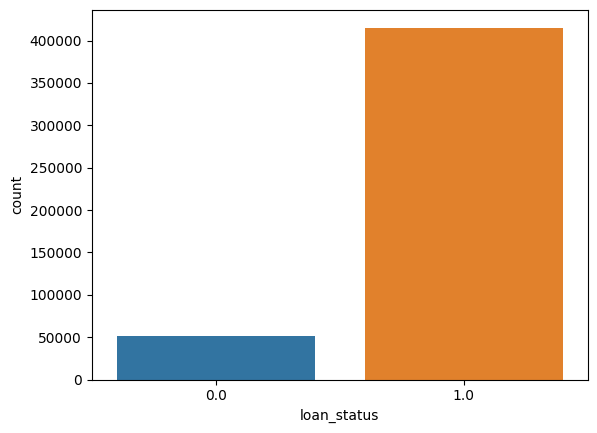

In [13]:
sns.countplot(x = 'loan_status', data = df_scaled)
df_scaled['loan_status'].value_counts()

In [61]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
#df_major = df_scaled[(df_scaled['loan_status']==1)] 
#df_minor = df_scaled[(df_scaled['loan_status']==0)]

# upsample minority class
#df_minor_upsampled = resample(df_minor, 
                                replace=True,    # sample with replacement
                                n_samples= 415317, # to match majority class
                                random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_minor_upsampled, df_major])

In [8]:
x = df_scaled.drop(columns=['loan_status'])
y = df_scaled['loan_status']

In [9]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123, n_jobs=-1, k_neighbors=5)
smote.fit(x, y)
x_smote, y_smote = smote.fit_resample(x, y)
print(x_smote.shape)
print(y_smote.shape)

(830634, 124)
(830634,)


<AxesSubplot: xlabel='loan_status', ylabel='count'>

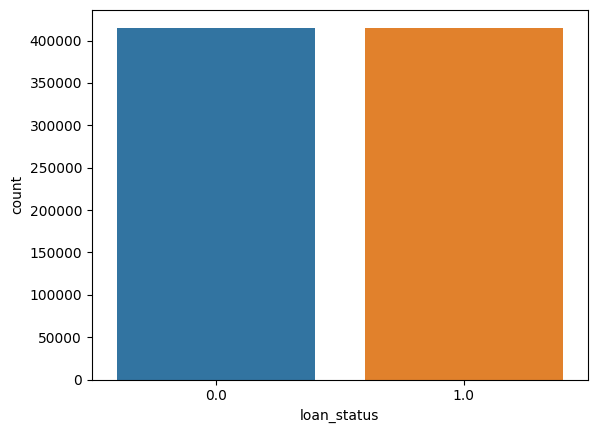

In [13]:
sns.countplot(x = y_smote)

0.0    415317
1.0    415317
Name: loan_status, dtype: int64

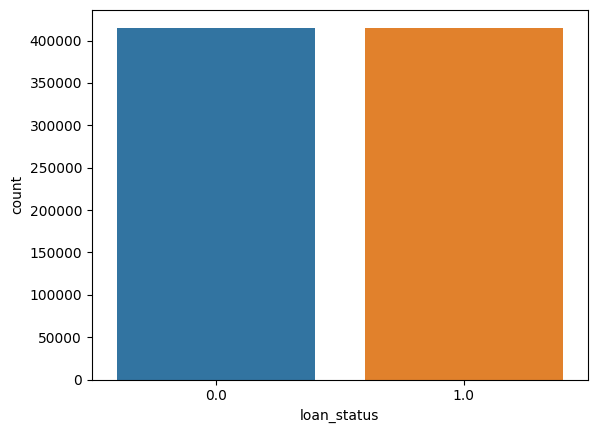

In [62]:
#sns.countplot(x = 'loan_status', data = df_upsampled)
#df_upsampled['loan_status'].value_counts()

### 1.11 data correlation

<AxesSubplot: >

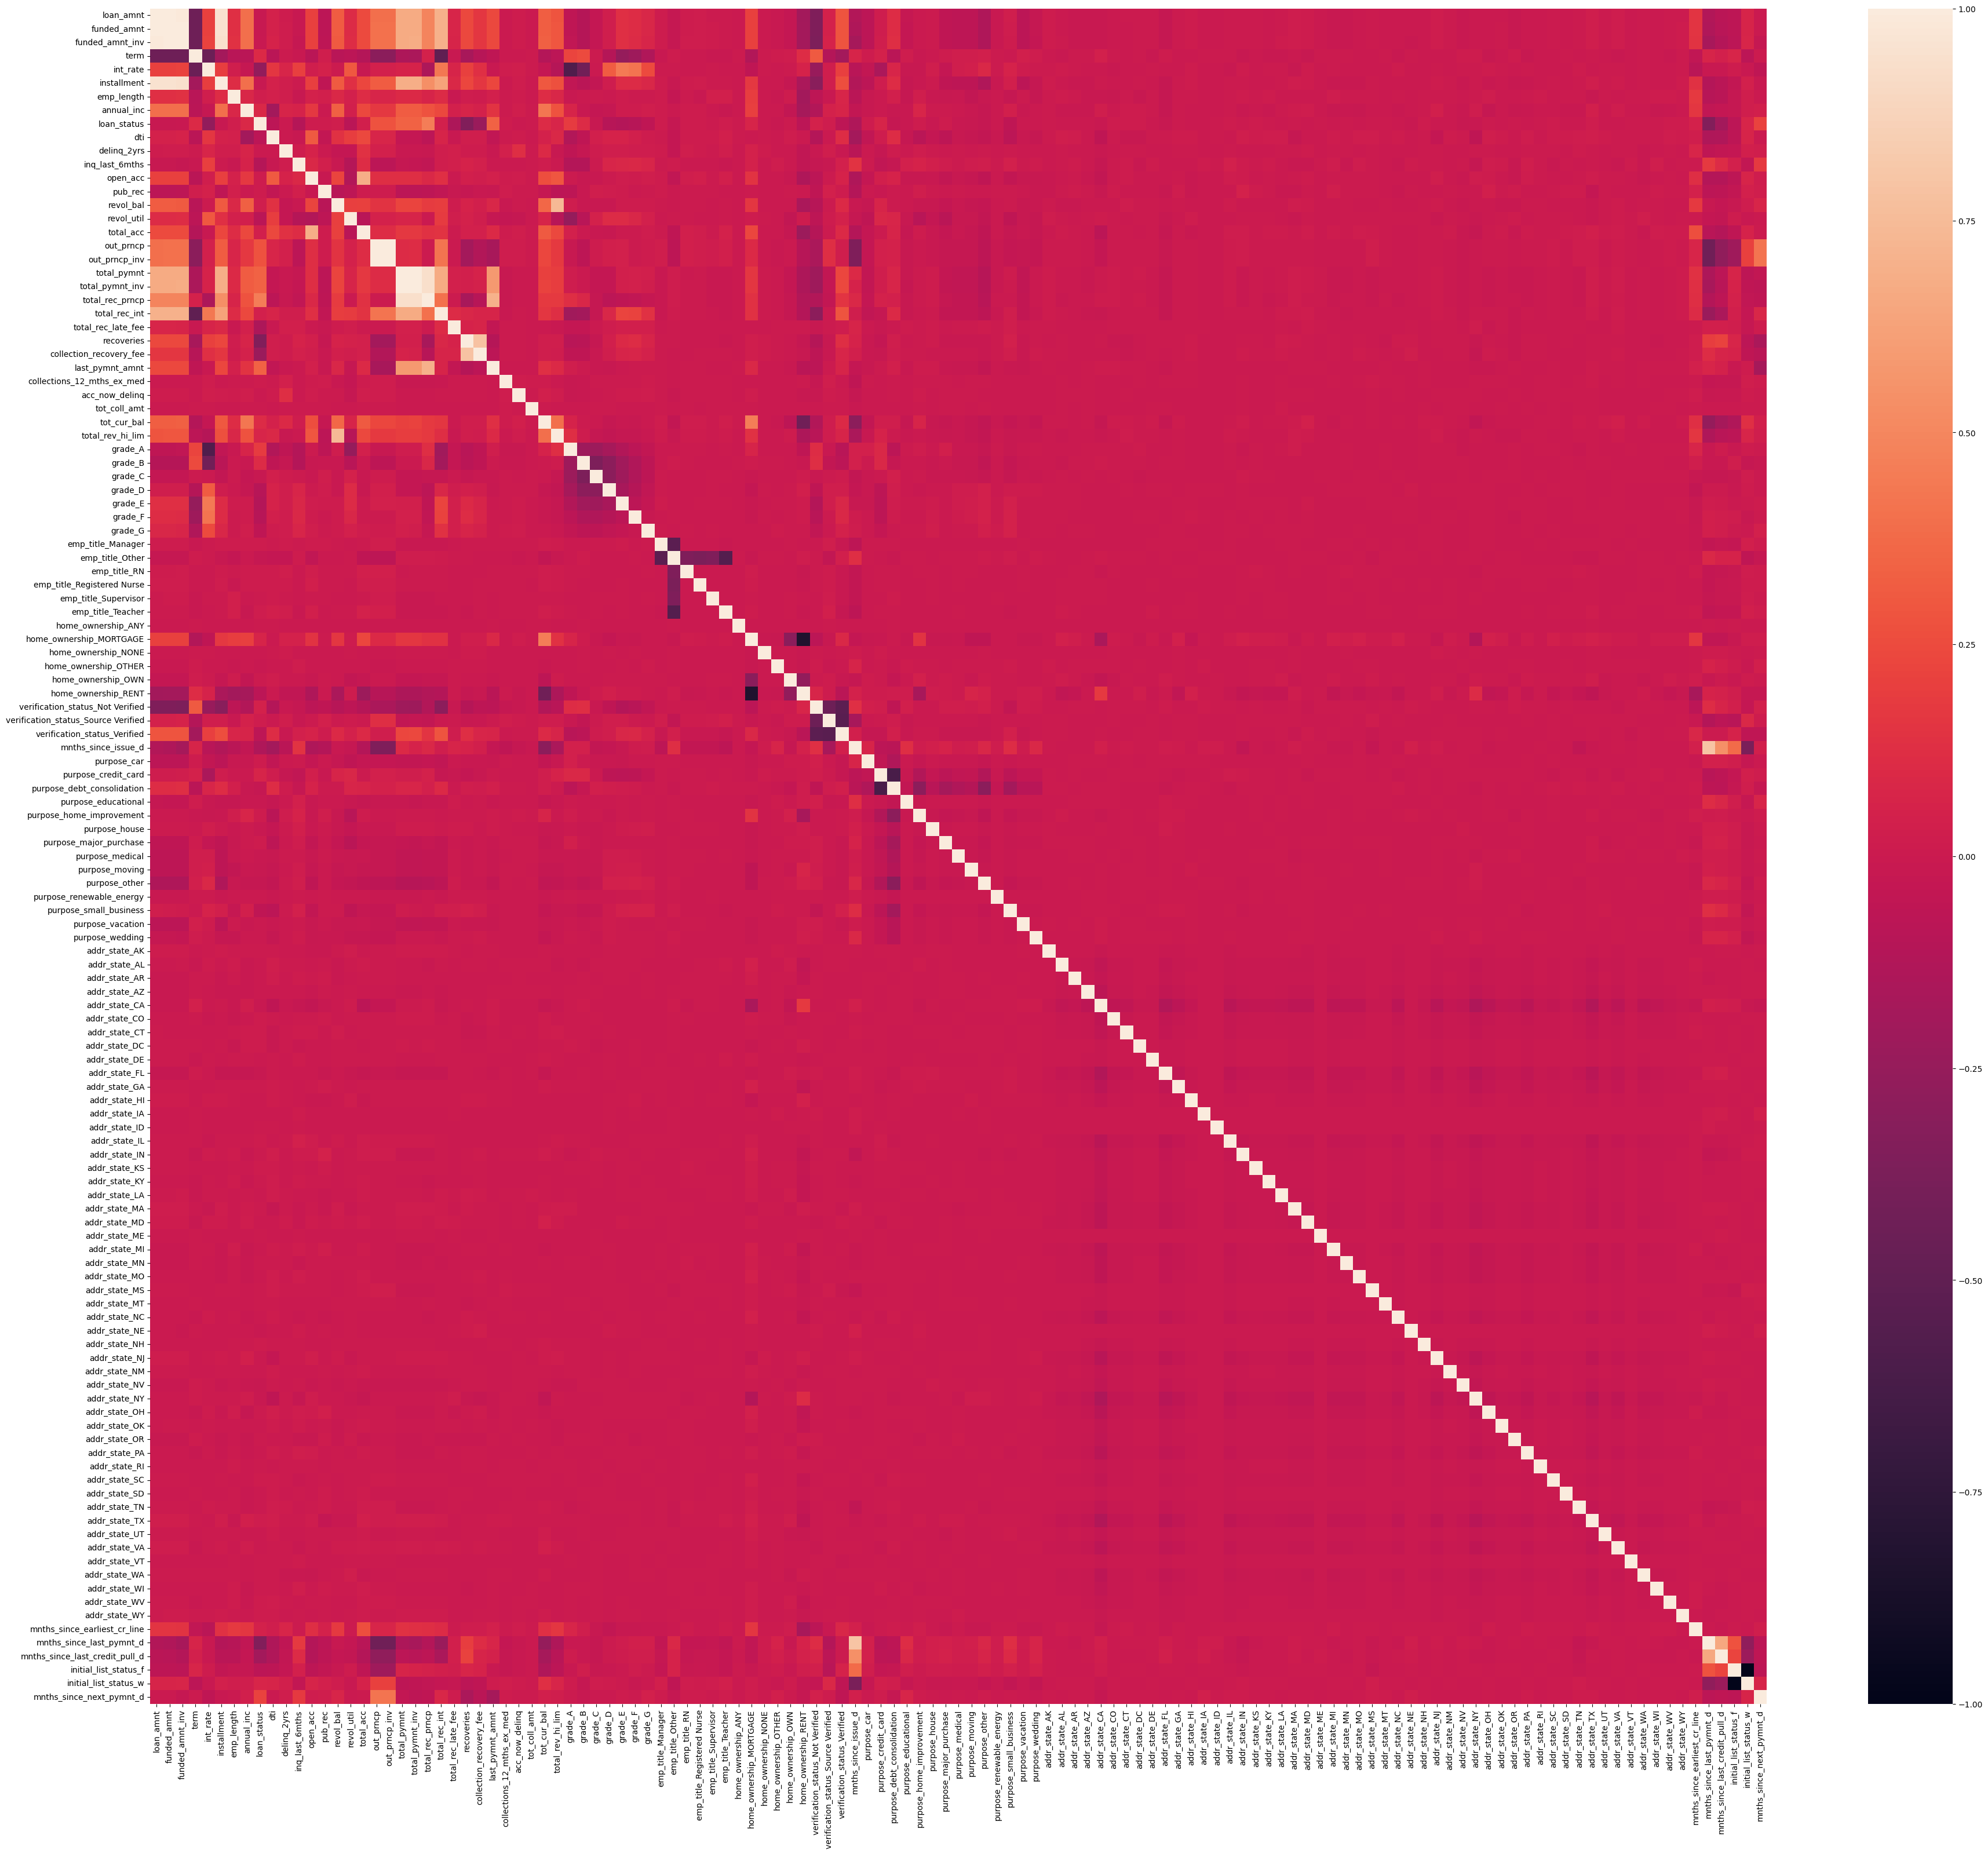

In [63]:
plt.figure(figsize=(45,38))
sns.heatmap(df_upsampled.corr(), fmt='.2mg')

# Machine Learning Building

## 1. feature selection

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable. Feature selection is primarily focused on removing non-informative or redundant predictors from the model.

In [10]:
# feature Selection using SelectKBest

chi2_selector = SelectKBest(chi2, k=17)
chi2_selector.fit(x_smote, y_smote)

cols = chi2_selector.get_support(indices=True)
df_selected = x_smote.iloc[:,cols]
df_selected.head()

,int_rate,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,grade_A,grade_B,grade_D,grade_E,grade_F,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,mnths_since_next_pymnt_d
0,0.253391,0.000000,0.000000,0.101442,0.100935,0.142857,0.000000,0.000000,0.004736,0.0,1.0,0.0,0.0,0.0,0.123711,0.000000,0.000000
1,0.477229,0.000000,0.000000,0.017459,0.017459,0.013042,0.003493,0.000159,0.003302,0.0,0.0,0.0,0.0,0.0,0.340206,0.269231,0.000000
2,0.510659,0.000000,0.000000,0.051986,0.051986,0.068571,0.000000,0.000000,0.017936,0.0,0.0,0.0,0.0,0.0,0.195876,0.000000,0.000000
3,0.390988,0.000000,0.000000,0.211610,0.211610,0.285714,0.000000,0.000000,0.009866,0.0,0.0,0.0,0.0,0.0,0.123711,0.115385,0.000000
4,0.352229,0.023846,0.023846,0.056115,0.056115,0.063803,0.000000,0.000000,0.001871,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.100917


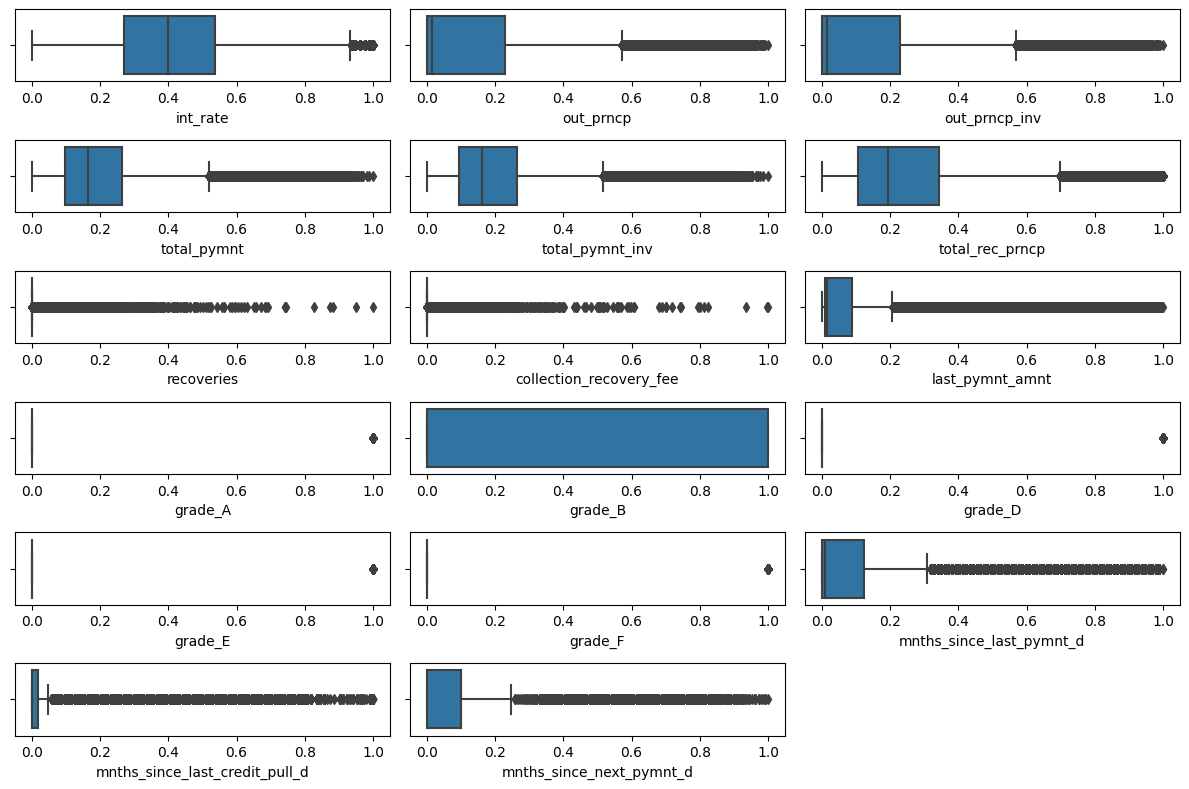

In [18]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df_selected):
    plt.subplot(6,3, i+1)
    sns.boxplot(x=df_scaled[col])
    plt.tight_layout()
    plt.style.use('default')    
    
plt.show()

## 2. handling outliers

In [11]:
# handling outliers

for i, col in enumerate(df_selected):
  Q1 = df_scaled[col].quantile(0.25)
  Q3 = df_scaled[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df_scaled = df_scaled[(df_scaled[col] >= low_limit) & (df_scaled[col] <= high_limit)]

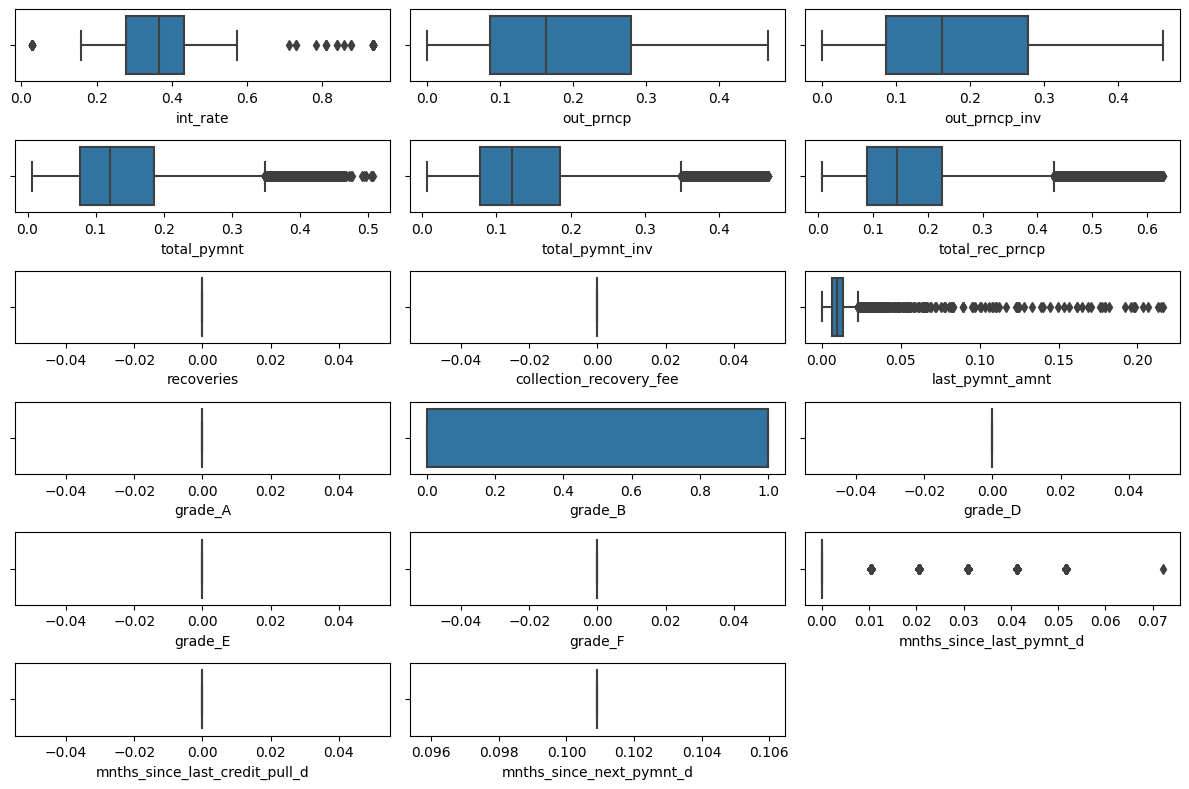

In [12]:
# remove outliers

plt.figure(figsize=(12,8))

for i, col in enumerate(df_selected):
    plt.subplot(6,3, i+1)
    sns.boxplot(x=df_scaled[col])
    plt.tight_layout()
    plt.style.use('default')    
    
plt.show()

## 3. training and testing data

In [13]:
# split data into training and testing

x_train, x_test, y_train, y_test = tts(df_selected, y_smote, test_size=0.20, random_state=123)
print(len(x_train), len(x_test))

664507 166127


## 4. feature scaling

In [15]:
# feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 5. ML model & evaluation

In [17]:
# machine learning model

from sklearn.neighbors import KNeighborsClassifier as KNN

KNN_model = KNN()
KNN_model = KNN_model.fit(x_train, y_train)

In [18]:
# predict the dataset
y_pred_KNN = KNN_model.predict(x_test)

# performance checking model using classification_report
print(classification_report(y_test, y_pred_KNN))

# model evaluation
acc_score_KNN = round(accuracy_score(y_pred_KNN, y_test), 3)
print('Accuracy model KNeighbors Classifier : ', acc_score_KNN)

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     83005
         1.0       0.97      0.98      0.97     83122

    accuracy                           0.97    166127
   macro avg       0.97      0.97      0.97    166127
weighted avg       0.97      0.97      0.97    166127

Accuracy model KNeighbors Classifier :  0.972


<AxesSubplot: >

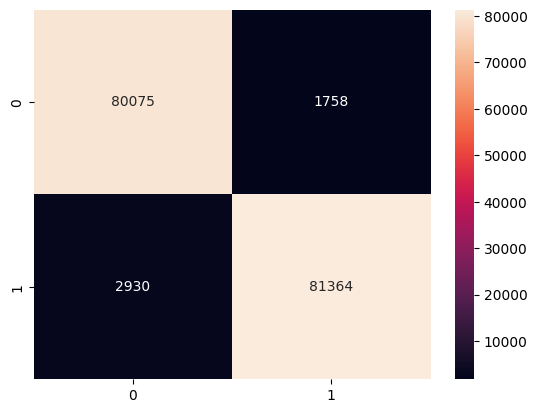

In [19]:
# confussion matrix

matrix_KNN = confusion_matrix(y_pred_KNN, y_test)
sns.heatmap(matrix_KNN, annot = True, fmt='d')